In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, stdev
from turtle import color

## Data exploration

In [7]:
df = pd.read_csv("ds_salaries.csv")

#### Quic look no data

In [8]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [10]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

I'm droping Unnamed column we don't need it

In [12]:
df = df.drop(columns="Unnamed: 0")

In [13]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


#### Categorical Columns

##### Sallary in time

In [16]:
df_salary = df[["work_year", "salary_in_usd"]].groupby("work_year").mean()
df_salary_job_title =df[["job_title", "salary_in_usd"]].groupby("job_title").mean()

##### Mean salary in every year

In [17]:
df_salary

,salary_in_usd
work_year,
2020,95813.000000
2021,99853.792627
2022,124522.006289


Job title with max mean

In [72]:
df_salary_job_title.sort_values(by="salary_in_usd", ascending=False).head()

,salary_in_usd
job_title,
Data Analytics Lead,405000.000000
Principal Data Engineer,328333.333333
Financial Data Analyst,275000.000000
Principal Data Scientist,215242.428571
Director of Data Science,195074.000000


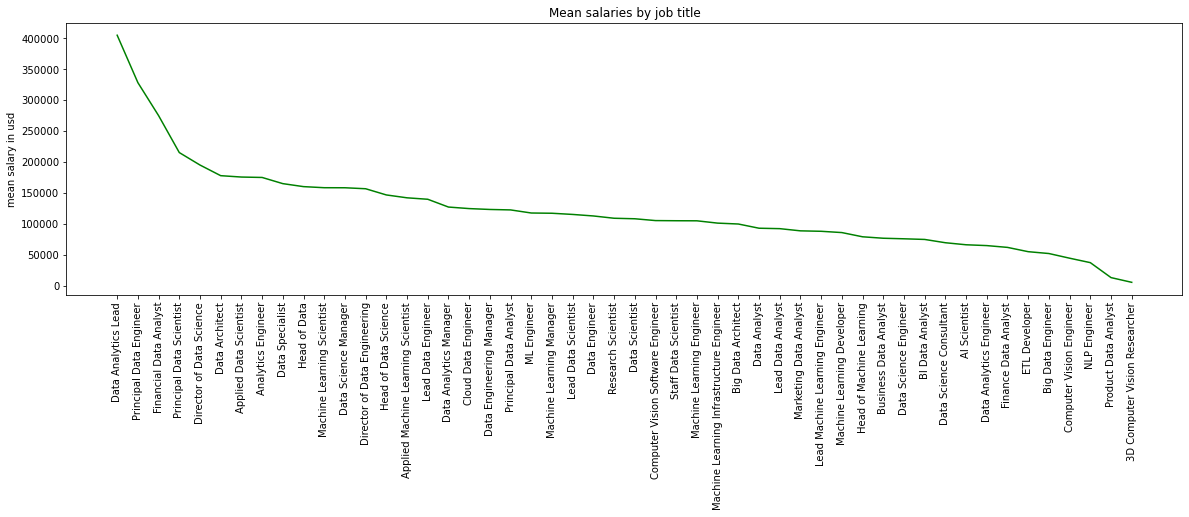

In [85]:
plt.figure(figsize=(20,5))
plt.plot(df_salary_job_title.sort_values(by="salary_in_usd", ascending=False), color="green")
plt.xticks(rotation=90)
plt.title("Mean salaries by job title")
plt.ylabel("mean salary in usd")
plt.show()

##### Job title

In [21]:
qty_of_jobs_title = df["job_title"].value_counts().size

print(f"Quantity of jobs: {qty_of_jobs_title}")

Quantity of jobs: 50


In [22]:
df["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

To my analys I'm taking 3 jobs title with the most records

In [23]:
df["job_title"].value_counts()[:3]

Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: job_title, dtype: int64

In [43]:
df_selected_jobs = df[(df["job_title"] == "Data Scientist") | (df["job_title"] == "Data Engineer") | (df["job_title"] == "Data Analyst")]

In [45]:
df_selected_jobs.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L


Basic statistics over all

In [58]:
df_selected_jobs.groupby("job_title")["salary_in_usd"].agg([min, max, mean, stdev, len])

,min,max,mean,stdev,len
job_title,,,,,
Data Analyst,6072,200000,92893.061856,39961.075848,97
Data Engineer,4000,324000,112725.000000,57629.082107,132
Data Scientist,2859,412000,108187.832168,64112.840519,143


Basic statistics based on experience

In [57]:
df_selected_jobs[(df_selected_jobs["experience_level"] == "SE")].groupby("job_title")["salary_in_usd"].agg([min, max, mean, stdev, len])

,min,max,mean,stdev,len
job_title,,,,,
Data Analyst,60000,200000,111922.629630,31016.993791,54
Data Engineer,25000,243900,137035.841270,46756.818234,63
Data Scientist,20171,412000,152971.016393,58985.402166,61


In [59]:
df_selected_jobs[(df_selected_jobs["experience_level"] == "MI")].groupby("job_title")["salary_in_usd"].agg([min, max, mean, stdev, len])

,min,max,mean,stdev,len
job_title,,,,,
Data Analyst,8000,167000,71699.206897,37710.835100,29
Data Engineer,4000,206699,85985.660377,44478.317556,53
Data Scientist,2859,200000,82039.133333,46869.579661,60


In [60]:
df_selected_jobs[(df_selected_jobs["experience_level"] == "EN")].groupby("job_title")["salary_in_usd"].agg([min, max, mean, stdev, len])

,min,max,mean,stdev,len
job_title,,,,,
Data Analyst,6072,91000,53960.666667,30232.550698,12
Data Engineer,21637,120000,58933.500000,25523.078710,12
Data Scientist,4000,105000,55330.909091,31237.823453,22


In [61]:
df_selected_jobs[(df_selected_jobs["experience_level"] == "EX")].groupby("job_title")["salary_in_usd"].agg([min, max, mean, stdev, len])

,min,max,mean,stdev,len
job_title,,,,,
Data Analyst,110000,130000,120000,14142.135624,2
Data Engineer,200000,324000,245500,55121.078848,4


#### Experiance level

SE - Senior \
MI - Mid \
EN - Junior \
EX - Expert 

In [62]:
df_selected_jobs["experience_level"].value_counts()

SE    178
MI    142
EN     46
EX      6
Name: experience_level, dtype: int64

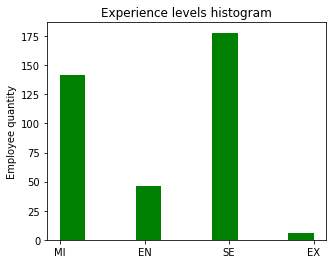

In [84]:
plt.figure(figsize=(5,4))
plt.hist(df_selected_jobs["experience_level"], color="green")
plt.title("Experience levels histogram")
plt.ylabel("Employee quantity")
plt.show();